In [4]:
from functions import bilinear_interpolation, bicubic_interpolation
from utils import visualize_3d_terrain, visualize_terrain
import numpy as np

In [1]:
size = 1024 
lattice_size = 256 
random_seed = 43


In [15]:
bl_terrain = np.zeros((size, size)) # for bilinear
bc_terrain = np.zeros((size, size)) # for bicubic

In [16]:
n_lattice_points = size // lattice_size + 1
np.random.seed(random_seed)
random_lattice_heights = np.random.rand(n_lattice_points, n_lattice_points)
random_lattice_heights.shape

(5, 5)

In [17]:

# Interpolate between lattice points
for i in range(n_lattice_points-1):
    for j in range(n_lattice_points-1):
        i0 = i * lattice_size
        i1 = (i + 1) * lattice_size
        j0 = j * lattice_size
        j1 = (j + 1) * lattice_size
        
        g00 = random_lattice_heights[i, j]
        g10 = random_lattice_heights[i + 1, j] #if i + 1 < coarse_size else coarse_terrain[0, j]
        g01 = random_lattice_heights[i, j + 1] #if j + 1 < coarse_size else coarse_terrain[i, 0]
        g11 = random_lattice_heights[i + 1, j + 1] #if i + 1 < coarse_size and j + 1 < coarse_size else coarse_terrain[0, 0]
        
        for x in range(i0, i1):
            for y in range(j0, j1):
                x_ratio = (x - i0) / lattice_size
                y_ratio = (y - j0) / lattice_size
                
                bl_terrain[x, y] = bilinear_interpolation(x_ratio, y_ratio, g00, g10, g01, g11)
                bc_terrain[x, y] = bicubic_interpolation(x_ratio, y_ratio, g00, g10, g01, g11)



In [2]:
from functions import generate_random_terrain_value
bl_terrain2, bc_terrain2 = generate_random_terrain_value(size, lattice_size, random_seed)

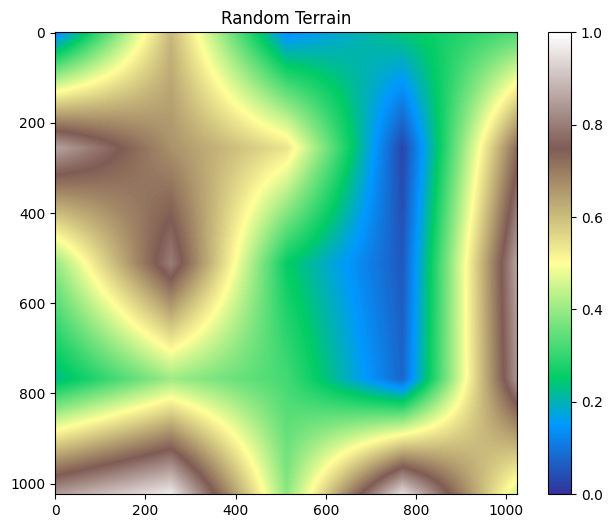

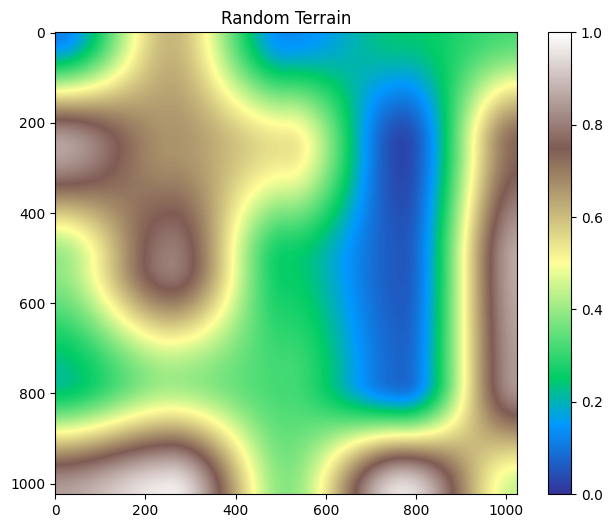

In [18]:
visualize_terrain(bl_terrain)
visualize_terrain(bc_terrain)

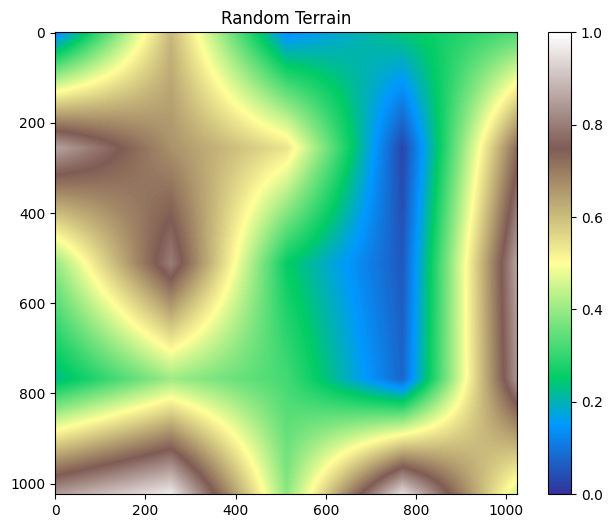

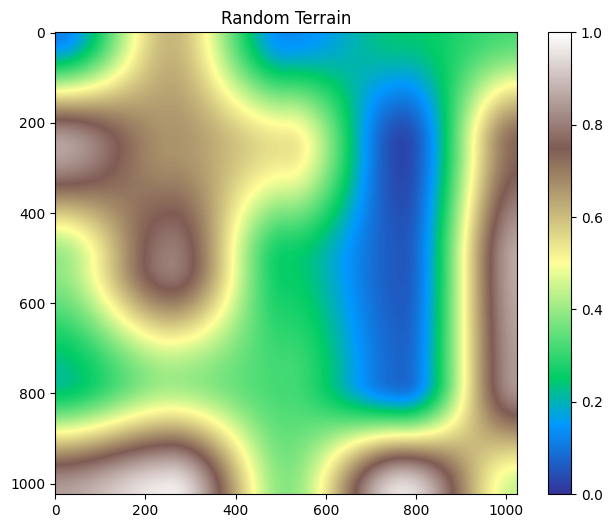

In [5]:
visualize_terrain(bl_terrain2)
visualize_terrain(bc_terrain2)

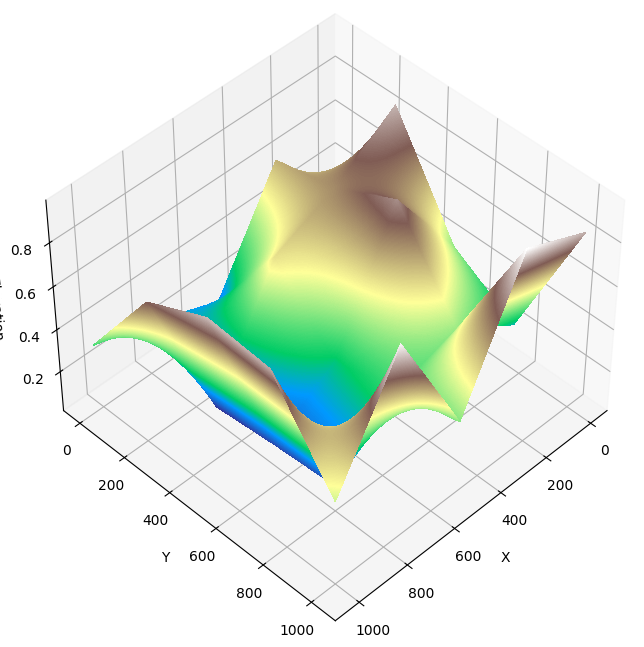

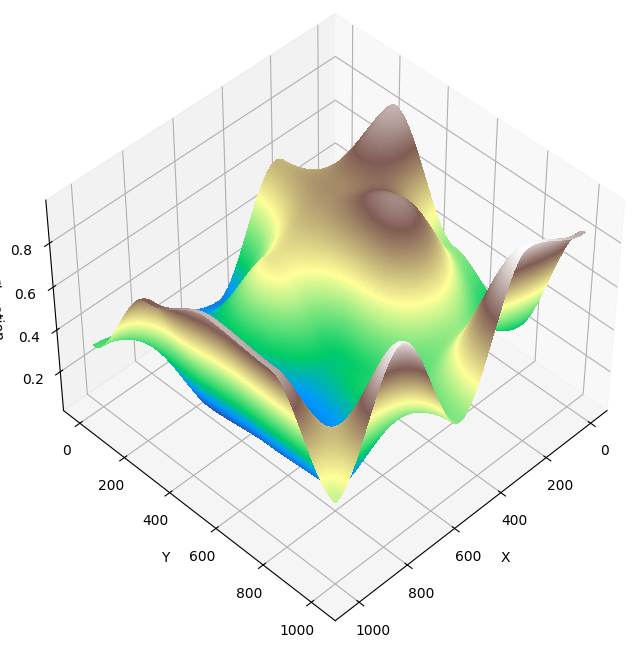

In [19]:
visualize_3d_terrain(bl_terrain, cmap='terrain', elev=45, azim=45)
visualize_3d_terrain(bc_terrain, cmap='terrain', elev=45, azim=45)